findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

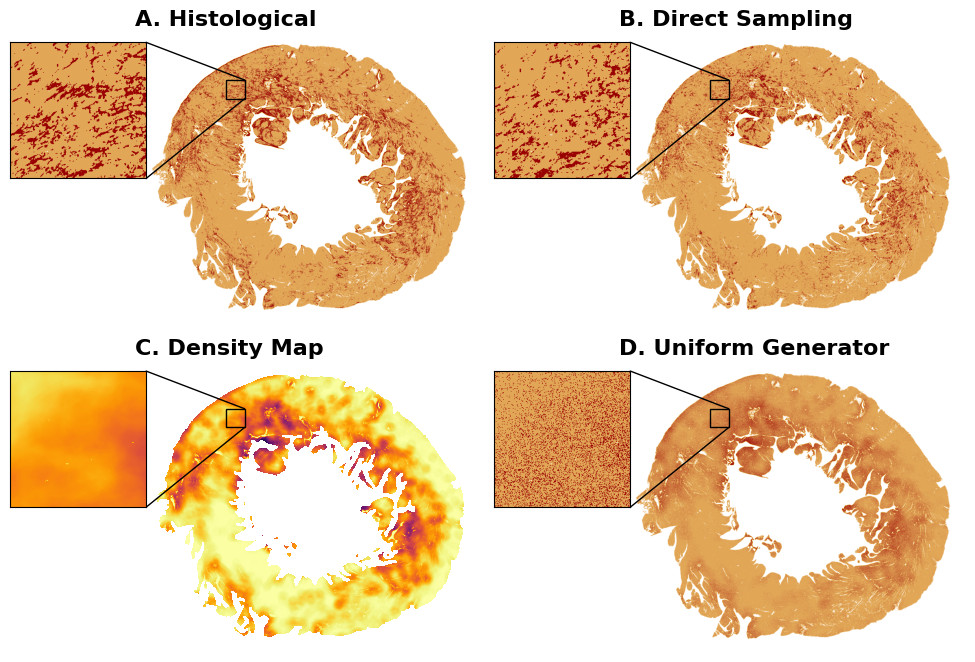

In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from skimage import morphology

from fibrosisanalysis.parsers import (
    ImageLoader,
    DensityLoader,
)

plt.rc('font', family='Helvetica')

cmap = colors.LinearSegmentedColormap.from_list(
    'fibrosis', [(0, 'white'),
                 (0.5, '#e2a858'),
                 (1, '#990102')])

path = Path('/home/arstan/Projects/Fibrosis/FibrosisAnalysis/data')
# path = Path('/Users/arstanbek/Library/CloudStorage/OneDrive-UGent/data')

heart = 'E11444_LMNA'
slice_name = 'E11444_08_SC2'

# /Users/arstanbek/Library/CloudStorage/OneDrive-UGent/data/E10927_MYBPC3/Images/E10927_10_SC2.png
# heart = 'E10927_MYBPC3'
# slice_name = 'E10927_10_SC2'


image_loader = ImageLoader(path)
image_ds = image_loader.load_slice_data(path.joinpath(heart, 'DS',
                                                      slice_name))
image_or = image_loader.load_slice_data(path.joinpath(heart, 'Images',
                                                      slice_name))
image_gen = image_loader.load_slice_data(path.joinpath(heart, 'Generated',
                                                       slice_name))

density_map = DensityLoader(path).load_slice_data(path.joinpath(heart,
                                                                'Density',
                                                                slice_name))
image_ds[image_or == 0] = 0


def plot_image(ax, image, cmap, title='', loc=[-0.4, 0.5, 0.47, 0.47]):
    y0 = 2400
    dy0 = 200
    x0 = 970
    dx0 = 200
    ax.imshow(image, cmap=cmap, origin='lower', aspect='equal')
    ax.axis('off')

    x1, x2, y1, y2 = x0, x0 + dx0, y0, y0 + dy0
    axins = ax.inset_axes(loc,
                          xlim=(x1, x2),
                          ylim=(y1, y2),
                          xticklabels=[],
                          yticklabels=[])
    axins.imshow(image, origin="lower", cmap=cmap)
    axins.set_xticks([])
    axins.set_yticks([])
    ax.set_title(title, fontsize=16, loc='left', fontweight=600)

    ax.indicate_inset_zoom(axins, edgecolor="black", lw=1, alpha=1)


fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(10, 7),
                        sharex=True, sharey=True)
plot_image(axs[0, 0], image_or, cmap, 'A. Histological')
plot_image(axs[0, 1], image_ds, cmap, 'B. Direct Sampling')
mask = morphology.remove_small_objects(image_or == 0, min_size=10_000)
density_map = np.ma.masked_where(mask, density_map)
plot_image(axs[1, 0], density_map, 'inferno_r', 'C. Density Map')
plot_image(axs[1, 1], image_gen, cmap, 'D. Uniform Generator')
plt.subplots_adjust(left=0.15, right=0.98, top=0.95, bottom=0.02,
                    wspace=0.4, hspace=0.02)
plt.show()


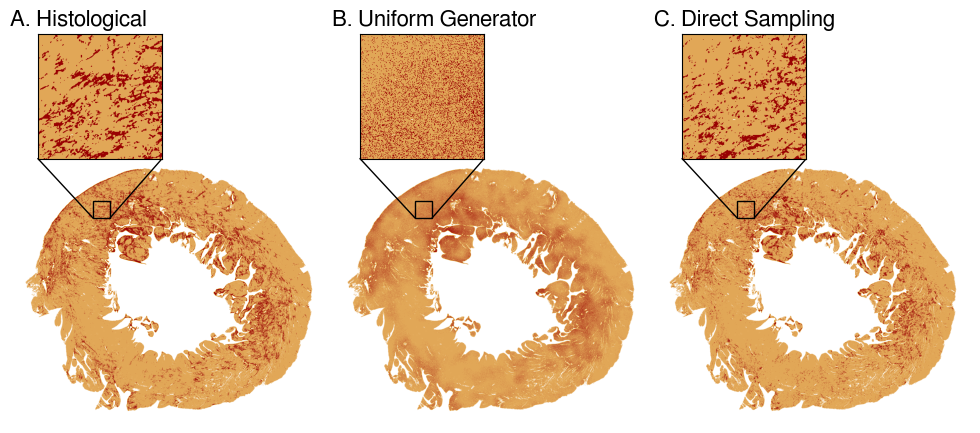

In [22]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from skimage import morphology

from fibrosisanalysis.parsers import (
    ImageLoader,
    DensityLoader,
)

plt.rc('font', family='FreeSans')

cmap = colors.LinearSegmentedColormap.from_list(
    'fibrosis', [(0, 'white'),
                 (0.5, '#e2a858'),
                 (1, '#990102')])

path = Path('/home/arstan/Projects/Fibrosis/FibrosisAnalysis/data')
# path = Path('/Users/arstanbek/Library/CloudStorage/OneDrive-UGent/data')

heart = 'E11444_LMNA'
slice_name = 'E11444_08_SC2'

# /Users/arstanbek/Library/CloudStorage/OneDrive-UGent/data/E10927_MYBPC3/Images/E10927_10_SC2.png
# heart = 'E10927_MYBPC3'
# slice_name = 'E10927_10_SC2'


image_loader = ImageLoader(path)
image_ds = image_loader.load_slice_data(path.joinpath(heart, 'DS',
                                                      slice_name))
image_or = image_loader.load_slice_data(path.joinpath(heart, 'Images',
                                                      slice_name))
image_gen = image_loader.load_slice_data(path.joinpath(heart, 'Generated',
                                                       slice_name))

density_map = DensityLoader(path).load_slice_data(path.joinpath(heart,
                                                                'Density',
                                                                slice_name))
image_ds[image_or == 0] = 0


def plot_image(ax, image, cmap, title='', loc=[0.05, 1., 0.47, 0.47]):
    y0 = 2400
    dy0 = 200
    x0 = 970
    dx0 = 200
    ax.imshow(image, cmap=cmap, origin='lower', aspect='equal')
    ax.axis('off')

    x1, x2, y1, y2 = x0, x0 + dx0, y0, y0 + dy0
    axins = ax.inset_axes(loc,
                          xlim=(x1, x2),
                          ylim=(y1, y2),
                          xticklabels=[],
                          yticklabels=[])
    axins.imshow(image, origin="lower", cmap=cmap)
    axins.set_xticks([])
    axins.set_yticks([])
    ax.set_title(title, fontsize=16, loc='left', fontweight=300)

    ax.indicate_inset_zoom(axins, edgecolor="black", lw=1, alpha=1)


fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(10, 7),
                        sharex=True, sharey=True)
plot_image(axs[0], image_or, cmap, 'A. Histological')
plot_image(axs[2], image_ds, cmap, 'C. Direct Sampling')
mask = morphology.remove_small_objects(image_or == 0, min_size=10_000)
density_map = np.ma.masked_where(mask, density_map)
plot_image(axs[1], image_gen, cmap, 'B. Uniform Generator')
plt.subplots_adjust(left=0.02, right=0.98, top=0.95, bottom=0.02,
                    wspace=0.02, hspace=0.02)
plt.show()


In [23]:
path_save = Path('/home/arstan/Projects/Fibrosis/FibrosisAnalysis/paperfigures/figures')
fig.savefig(path_save.joinpath('generators.png'),
            dpi=300, bbox_inches='tight')